-----------------------

# **✔️ Problem Formulation**

- ## Define the problem

   - The important part before starting to do any thing, we understand the problem very well to be able to be soundness about features you need and features have effect on your prediction.
   
   - Our goal of this problem is to predict if a specific reddit post is fake news or not, by looking at its title. As we knew that False information on the Internet has caused many social problems due to the raise of social network and its role in different. So, it is important to design model helps us in classifying our news. 
   
  - Our output is in categories from 0 to 1. This is a binary classification task. Given a data sample (contains various forms of words), we are going to predict the probability (0-1, float).
   

# Liberaries 
-----------------------------------------------
----------------------------------------------

In [ ]:
!pip install xgboost
!pip install scikit-optimize
!pip install nltk
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import sklearn
import pandas as pd
import numpy as np
import nltk 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from langdetect import detect
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
!pip install deep_translator
from deep_translator import GoogleTranslator
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder, StandardScaler , LabelEncoder
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import PredefinedSplit
from skopt import BayesSearchCV
import scipy.stats as ss
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
import seaborn as sns
import math
from sklearn.feature_selection import SelectKBest, mutual_info_classif

plt.rcParams["figure.figsize"] = (20,15)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
pd.set_option("display.max.columns", None)#that’s probably more readable than wrapping long rows
pd.set_option("display.max.rows", None)#that’s probably more readable than wrapping long columns

# Read Data

In [ ]:
train_data = pd.read_csv("/content/xy_train.csv")
test_data = pd.read_csv("/content/x_test.csv")
data = train_data.copy()
submission_data = test_data.copy()
print("Shape of train data : ",train_data.shape )
print("Shape of test data : ",test_data.shape )

Shape of train data :  (60000, 3)
Shape of test data :  (59151, 2)


In [ ]:
data.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


**Observation** 💡💡💡💡💡

- As you can see, we have a training set (with labels), and a testing set (without labels). The training set  consists of one feature. In other hand, testing set has the same feature except the target column.
- Size of training data is  60000 which is pretty good 😇😇😇. Machine learning likes large data. The data is the backbone of machine learning

- We noticed that the data is not clean 😳😳😳. As you can see, there some special characters. the data have to clean to get a good model. Garbage in garbage out 🔥🔥🔥🔥. We will clean it.



# Helper Functions 

---



---



In [ ]:
class preprocessing:
    
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
        
    #------------------------------- Check null ^_^ ------------------------------------
    '''
    This function counts null in each column in the dataframe and calculate the percent of nulls in the column then return the 
    dataframe consist of 2 columns :  one contains count of null values in each column and second contains percent 
    '''
    def null_values(self):
        null_val = pd.DataFrame(self.dataframe.isnull().sum())
        null_val.columns = ['null_val']
        null_val['percent_'] = round(null_val['null_val'] / len(self.dataframe.index), 2) * 100
        null_val = null_val.sort_values('percent_', ascending = False)
        return null_val
    #------------------------------- Check duplication ^_^  ------------------------------------
    '''
    This function counts duplicated rows in the dataframe 
    '''
    def duplicated_values(self):
        return print("Number of duplicated rows" , self.dataframe.duplicated().sum())
    #--------------------------------------- drop columns  ^_^ ---------------------------------------   
    '''
    This function drop duplicated columns 
    '''
    
    def drop_col(self):
        self.dataframe = self.dataframe.drop_duplicates()
        return self.dataframe
  
    #-------------------------------------------------- preprocess string ^_^ -----------------------------------
    '''
    This function helps us to apply some preprocessing steps like lowering words, removing regex characters , removing some words aren't important ,removing numbers ,and tokenizing sentence into words 
    in the text column . This function gives three options :
     1. use lemmati
     
    '''

    def clean_text(self , text, for_embedding=False , for_stemming = False):
        """ steps:
            -  all lowercase
            - remove any html tags (< /br> often found)
            - Keep only ASCII + European Chars and whitespace, no digits
            - remove single letter chars
            - convert all whitespaces (tabs etc.) to single wspace
            - remove numbers
            - remove url
            if not for embedding (but e.g. tdf-idf) and not stemming:
            - all lowercase
            - remove stopwords, punctuation and lemmatize
            if for stemming :
            - all lowercase
            - remove stopwords, punctuation and stem

        """
        stemmer = SnowballStemmer("english")
        stop_words = set(stopwords.words("english"))
        lemmatizer = WordNetLemmatizer()
        # text = self.detect_and_translate(text) # we tried to translate forgien words but it takes large time. So, we comment this line to save our time.
        text=str(text)
        text = text.lower() # lower words 

        RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
        RE_TAGS = re.compile(r"<[^>]+>")
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
        
        if for_embedding:
            # Keep punctuation
            RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
            RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

        text = re.sub(RE_TAGS, " ", text)
        text = re.sub(RE_ASCII, " ", text)
        text = re.sub(RE_SINGLECHAR, " ", text)
        text = re.sub(RE_WSPACE, " ", text)
        rem_url=re.sub(r'http\S+', '',text) # Remove any url 
        rem_num = re.sub('[0-9]+', '', rem_url) # Remove numbers
        tokenizer = RegexpTokenizer(r'\w+') #
        word_tokens = tokenizer.tokenize(rem_num)  #Tokenize sentences into words 


        if for_embedding:
            # no stemming, lowering and punctuation / stop words removal
            words_filtered = word_tokens
        elif for_stemming:
            words_filtered = [
                  stemmer.stem(word) for word in word_tokens if word not in stop_words
              ]
        else:
            words_filtered = [
                lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words
            ]

        text_clean = " ".join(words_filtered)
        return text_clean

      #--------------------------------------- translation  ^_^ ---------------------------------------   
    '''
    we discovered that there is some of forgein words in different langnague. 
    So, we implemented this function to detect and translate these words from any language into english.
    '''

    def detect_and_translate(self , text):
        
        result_lang = detect(text)
        
        if result_lang == 'en':
            return text 
        
        else:
            translator = GoogleTranslator(source='auto', target='en')
            translate_text = translator.translate(text)
            return translate_text 


  
           
nltk.download('punkt')
nltk.download('stopwords')        
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Explore Data 
---------------
---------------------


### Describe data

In [ ]:
train_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


**Observation**  💡💡💡💡💡
- As you can see, we have a bout 3 columns. One of them is object and the rest is int64. 
- text and label columns are the most important columns. id column is useless. we will not use it. 
- There is no null values in our data 🥳🥳🥳🥳. Let's move on to discover more about this.


### Describe numerical features

In [ ]:
#--------------------------- Calculate length of text ^_^ ----------------------------------------
''' 
This function calculate length of text in each row in our dataframe  
'''
def text_length(df_):
  return len(df_)

# apply the previous function to get column of length calculate text length in each row  
train_data['length']  = train_data['text'].apply(text_length)

In [ ]:
print("Number of numerical columns in the data is : ", train_data.describe().shape[1])
train_data.describe()

Number of numerical columns in the data is :  3


,id,label,length
count,60000.000000,60000.000000,60000.000000
mean,280243.619717,0.467667,124.944350
std,162623.600284,0.506648,226.356902
min,0.000000,0.000000,85.000000
25%,138541.250000,0.000000,93.000000
50%,279910.500000,0.000000,106.000000
75%,421243.250000,1.000000,132.000000
max,562695.000000,2.000000,19668.000000


 **Observation** 💡💡💡💡💡

- As we mentioned before, we aren't intersted in id column. So, we willnot discuss or analyze it.
- As you can see, Label column has 3 catigories form 0 to 2. From problem formulation, we knew that Our output(label) is in categories from 0 to 1. So,we will deal with this problem later.

- From Length column, we can see that the size of text is from 85 upto 19668 characters. 


### Visualize data distribution

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'label'}>],
       [<AxesSubplot:title={'center':'length'}>, <AxesSubplot:>]],
      dtype=object)

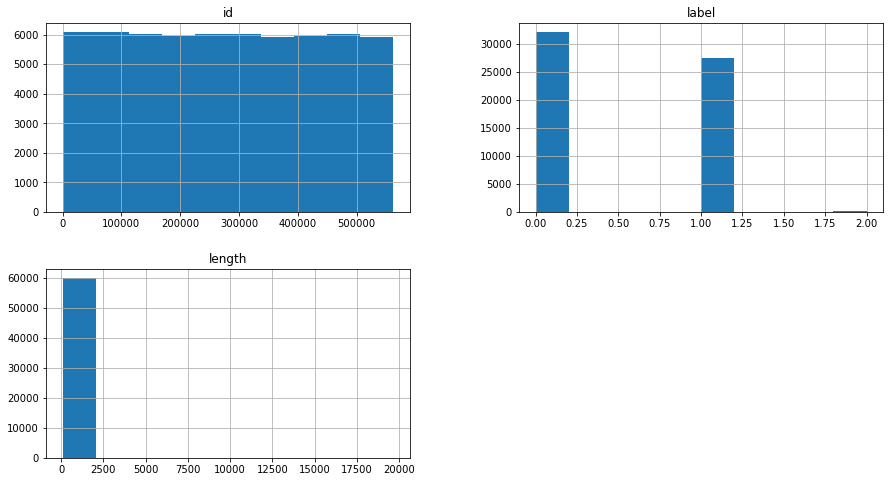

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
train_data.hist()

**Observation**💡💡💡💡💡

- Graphs confirm our insight before that there is an extra category in the label column.
- The difference between class 1 and class 0 in label column isn't significant. There is no imbalance in our target🥳🥳🥳🥳.

### Describe categorigal data

In [ ]:
print("Number of categorical columns in the data is : ", train_data.describe(include=['O']).shape[1])
train_data.describe(include=['O'])

Number of categorical columns in the data is :  1


,text
count,60000
unique,59645
top,/r/Fakehistoryporn subscribers as they attempt...
freq,14


**Observations**💡💡💡💡💡


We noticed that :

- we have about 355 rows are duplicated. we will deal with these rows later.
- There is no null values in the text column.

#### Convert type of text column from object to category


---



---


In [ ]:
# Convert type of text column from object to category. Apply this on train data and submission data
train_data['text'] = train_data['text'].astype("category")
submission_data['text'] =  submission_data['text'].astype("category")

# Target Column
--------------------------------------------------------------------------
--------------------------------------------------------------------------

classes in rating column [0 1 2]


<AxesSubplot:>

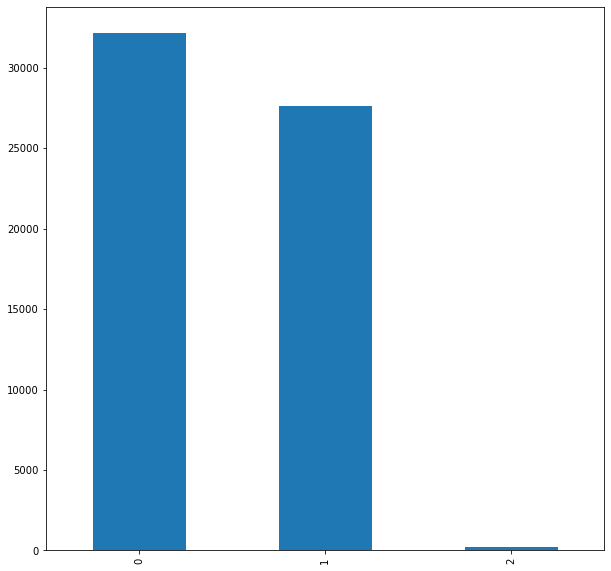

In [ ]:
plt.rcParams['figure.figsize'] = [10,10]
print("classes in rating column" , np.unique(data["label"]))
#plot count of each class in target column 
train_data["label"].value_counts().plot(kind='bar')

In [ ]:
train_data["label"].value_counts(normalize=True)


0    0.536200
1    0.459933
2    0.003867
Name: label, dtype: float64

**Observation**

- The output label is 0 or 1 (fake or not). Class 2 DOESN'T belong to our target. Don't worry will solve this problem 
- There is no imbalance between classes. class 0 and 1 is almost close to each other. Class 0 is 53.6200 % while class 1 is 45.9933 %.
- Thanks to allah, class 2 doesn't have large percent in our data. It is only 0.3%



# Apply on Training Data
-------------------------------------------------
--------------------------------------------------

In [ ]:
# Call the preprocessing class to discover train data and apply preprocessing methods
preprocessing_steps = preprocessing(train_data.drop('id', axis =1))
# Call the preprocessing class to apply preprocessing methods also on submission_data
preprocessing_steps_sub = preprocessing(submission_data)



# Explore Data
------------------------------------------------------------
-------------------------------------------------------

- ### Check null values

In [ ]:
preprocessing_steps.null_values()

,null_val,percent_
text,0,0.0
label,0,0.0
length,0,0.0


**Observation**💡💡💡💡💡
- There is no null values 🥳🥳🥳🥳

- ### Check duplications

In [ ]:
preprocessing_steps.duplicated_values()

Number of duplicated rows 345


**Observations**💡💡💡💡💡

- Here , we  see that there are only 345 rows duplicated although we noticed in the previous sections that there are about 5 rows are duplicated in text column. we can justify that. Maybe the labels of these rows are different. That means they may take class2. Don't worry, we will recover this.



# Preprocessing Stage 
------------------------------------
---------------------------------------




### Drop duplicated rows

In [ ]:
train_data = preprocessing_steps.drop_col()
print(preprocessing_steps.duplicated_values())
print("Shape of train data after dropping duplicated rows" , train_data.shape)

Number of duplicated rows 0
None
Shape of train data after dropping duplicated rows (59655, 7)


### Apply different preprocessing on text column

Here, we tried to prepare our data to use them later in the model. we applied different preprocessing methods on text to use them in our trails and compare between them. This will give us indication know which one is the best.

In [ ]:
# Apply lematization on text on both train and submission data
train_data["text_clean_lemma"] = train_data["text"].map(lambda x: preprocessing_steps.clean_text(x, for_embedding=False, for_stemming =False) if isinstance(x, str) else x)
submission_data["text_clean_lemma"] = submission_data["text"].map(lambda x: preprocessing_steps_sub.clean_text(x, for_embedding=False,for_stemming =False) if isinstance(x, str) else x)
# Apply stemming on text on both train and submission data
train_data["text_clean_stem"] = train_data["text"].map(lambda x: preprocessing_steps.clean_text(x, for_embedding=False, for_stemming = True) if isinstance(x, str) else x)
submission_data["text_clean_stem"] = submission_data["text"].map(lambda x: preprocessing_steps_sub.clean_text(x, for_embedding=False , for_stemming = True) if isinstance(x, str) else x)
# Apply special preprocessing to use cleaned data with embedding methods on text on both train and submission data
train_data["text_clean_emb"] = train_data["text"].map(lambda x: preprocessing_steps.clean_text(x, for_embedding=True ,for_stemming =False) if isinstance(x, str) else x)
submission_data["text_clean_emb"] = submission_data["text"].map(lambda x: preprocessing_steps_sub.clean_text(x, for_embedding=True, for_stemming =False) if isinstance(x, str) else x)


### Create binary classification. replace 2 with nan values


In [ ]:
train_data["label_clean"] = 0
train_data.loc[train_data["label"] >= 1, "label_clean"] = 1
train_data.loc[train_data["label"] >= 2, "label_clean"] = np.NaN

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59655 entries, 0 to 59999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              59655 non-null  object 
 1   label             59655 non-null  int64  
 2   length            59655 non-null  int64  
 3   text_clean_lemma  59655 non-null  object 
 4   text_clean_stem   59655 non-null  object 
 5   text_clean_emb    59655 non-null  object 
 6   label_clean       59423 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.6+ MB


In [ ]:
train_data.isna().sum()

text                  0
label                 0
length                0
text_clean_lemma      0
text_clean_stem       0
text_clean_emb        0
label_clean         232
dtype: int64

**Observation**💡💡💡💡💡

- After replacing class 2 with nan, we got null values. As you can see, they are about 232 null values in label_clean column 😞😞😞😞
- After cleaning text, we have to check if there are rows with empty text " ".
- Next step , we will drop  empty text " " and nan values(232) in label_clean.

In [ ]:
# Drop when any of text with empty ""
train_data = train_data[(train_data["text_clean_stem"] != "") | (train_data["text_clean_stem"] != "null")]
# drop nan values in columns
train_data = train_data.dropna( axis="index", subset=["label_clean", "text", "text_clean_lemma" ,'text_clean_emb',"text_clean_stem"]).reset_index(drop=True)
data_clean = train_data.copy() #just take a copy of train data

In [ ]:
train_data[(train_data["text_clean_stem"] == "") | (train_data["text_clean_stem"] == "null")].index

Int64Index([30, 38, 41, 50, 56, 877, 1403, 3656, 9046, 9339], dtype='int64')

In [ ]:
train_data[(train_data["text_clean_emb"] == "") | (train_data["text_clean_emb"] == "null")].index


Int64Index([30, 38, 41, 50, 56, 881, 1409, 3668, 9100, 9394], dtype='int64')

In [ ]:
train_data[(train_data["text_clean_lemma"] == "") | (train_data["text_clean_lemma"] == "null")].index


Int64Index([30, 38, 41, 50, 56, 881, 1409, 3668, 9100, 9394], dtype='int64')

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59423 entries, 0 to 59422
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              59423 non-null  object 
 1   label             59423 non-null  int64  
 2   length            59423 non-null  int64  
 3   text_clean_lemma  59423 non-null  object 
 4   text_clean_stem   59423 non-null  object 
 5   text_clean_emb    59423 non-null  object 
 6   label_clean       59423 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ MB


Now, we are ready our data is cleaned 🙌🙌🙌

In [ ]:
print("Shape of train data after cleaning " , data_clean.shape)
print("Shape of submission data after cleaning " , submission_data.shape)

print("Columns of train data after cleaning " , data_clean.columns)
print("Columns of submission data after cleaning " , submission_data.columns)

Shape of train data after cleaning  (59423, 7)
Shape of submission data after cleaning  (59151, 5)
Columns of train data after cleaning  Index(['text', 'label', 'length', 'text_clean_lemma', 'text_clean_stem',
       'text_clean_emb', 'label_clean'],
      dtype='object')
Columns of submission data after cleaning  Index(['id', 'text', 'text_clean_lemma', 'text_clean_stem', 'text_clean_emb'], dtype='object')


# Split data into train & test
----------------------------------------------------------------
--------------------------------------------------------------

In [ ]:
# Sample data - 25% of data to test set
train, test = train_test_split(data_clean, random_state=7777777, test_size=0.25, shuffle=True)


X_train_stem = train["text_clean_stem"]
Y_train = train["label_clean"]
X_test_stem = test["text_clean_stem"]
Y_test = test["label_clean"]

X_train_lemma = train["text_clean_lemma"]
X_test_lemma = test["text_clean_lemma"]

X_train_emb = train["text_clean_emb"]
X_test_emb = test["text_clean_emb"]



print(train.shape)
print(test.shape)


(44567, 7)
(14856, 7)


**Observation** 💡💡💡💡💡


- As you can see, we split a training set (with labels) into 2 sets : train set to train our model and test set to evaluate our model before using it. Test set is unseen data we used after fitting model to know our model performs well or not. 



# Model

In [ ]:
np.random.seed(1223)

#-------------------------------------- Build model ^_^ ----------------------------
''' 
This Function takes model and vectorization method .Then combine them in single pipeline 
'''

def buid_model(model_trail , vectorize_word ):
    # combine the preprocessor with the model as a full tunable pipeline
    # we gave them a name so we can set their hyperparameters
    model = Pipeline(steps=[("vectorize", vectorize_word), ("model", model_trail)])
    return model

# Evaluate Model

In [ ]:
#------------------------------ Evaluation Function ^_^ --------------------------
'''
This Function takes model and evaluate this model on train and test data through some evaluation matrics such as classification report , auc ,and accuracy.
'''
def evaluation(model , x_train , x_test , y_test , y_train):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    class_repo = classification_report(y_test, y_pred_test)
    print("Classification report" , class_repo)
    
    test_acc = accuracy_score(y_test ,y_pred_test)
    train_acc = accuracy_score(y_train,y_pred_train)
    print("Accuracy in train data" , train_acc)
    print("Accuracy in test data" , test_acc)

    prob_y_pred = model.predict_proba(x_test)[:,1]
    prob_y_pred_train = model.predict_proba(x_train)[:,1]
    
    #calculate AUC of model
    auc = metrics.roc_auc_score(y_test, prob_y_pred)
    auc_train = metrics.roc_auc_score(y_train, prob_y_pred_train)
    

    #print AUC score
    print("AUC test " , auc)
    print("AUC train " , auc_train)
    
    return  test_acc , train_acc , auc
#------------------------------ Save Model ^_^ --------------------------
'''
This Function takes model and its name .Then save it in pickle format
'''
def save_model(model , model_name):
    # save model
    joblib.dump(model, "model_{}.pk".format(model_name))

# Submission

In [ ]:
#------------------------------ csv creation Function ^_^ --------------------------
'''
This Function takes model and submission_data .Then apply model in this data. save the predicted values in csv file 
'''
def submitted_file(model ,  data , model_name):
    submission = pd.DataFrame()

    submission['id'] = submission_data['id']

    submission['label'] = model.predict_proba(data)[:,1]

    submission.to_csv('sample_submission_walkthrough_{}.csv'.format(model_name), index=False)

--------------------------------
-------------------------------------
-----------------------------------
#✔️ Now, we are ready to start our trails 
 
 - Our approach is that we will try different classifiers and tune these classifiers to find best hyper parameters. Our problem is pretty complex.
So, we Chose most powerful models that can handel this problem with high performance. The most powerful models are Randomforest , xgboost , gradient xgboost ,and logistic regression.

Let's move on and see the behaviour of each one.
---------------------------
-------------------------------------
--------------------------------

# Random Forest Grid Search (1st trail)
(Lemmatization )


---



---



---



- we used randomforest model and applied a lemmatization as a preprocessing method in text. Also, we applied grid search cross validation with 5 kfold to tune this model. we chose the best model that have the highest auc. 

- In this trail, we covered:

  - Lemmatization preprocessing 
  - A tunable pipeline including word-level vectorizer.
  - gridseacrh method with cross validation 

- we hope that the previous combination improve our performance.



In [ ]:
Random_forest_model = RandomForestClassifier()
Random_forest_model = buid_model(Random_forest_model , TfidfVectorizer())
param_grid_1st = {
    "vectorize__ngram_range": [(1, 2), (1, 3)],
    "vectorize__max_df": np.arange(0.3, 0.8),
    "vectorize__min_df": np.arange(5, 100),
    'model__n_estimators': [20, 30, 40 , 50],  
    'model__max_depth':[10, 20, 30 , 80, 77]  ,
    'model__class_weight' : ['balanced', 'balanced_subsample'],
    'model__n_estimators' : [20,100,170 ,77]
}

grid_search_1st = GridSearchCV(Random_forest_model, param_grid_1st, cv=5, verbose=5, n_jobs=-1, scoring='roc_auc')
grid_search_1st.fit(X_train_lemma, Y_train)

print('best score {}'.format(grid_search_1st.best_score_))
print('best params 1st trail (lemma_grid search) {}'.format(grid_search_1st.best_params_))

Fitting 5 folds for each of 7600 candidates, totalling 38000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 2166 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 3030 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 3516 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | ela

best score 0.8286776042192028
best params 1st trail (lemma_grid search) {'model__class_weight': 'balanced_subsample', 'model__max_depth': 80, 'model__n_estimators': 170, 'vectorize__max_df': 0.3, 'vectorize__min_df': 5, 'vectorize__ngram_range': (1, 3)}


**Observation 💡💡💡💡💡**
- After 13 hours of training 😑😑😑, we got only 83 % auc.
- Acually, we weren't lucky enough in choosing our search space. Grid search tried all possible values. Maybe if we choose another search space or model or even changing preprocessing methods, our model will improve.


- Don't be too quick to judge. Let's see how the model perforn on unseen data.

### Evaluate 


---



---



---




In [ ]:
test_acc , train_acc , auc = evaluation(grid_search_1st , X_train_lemma, X_test_lemma, Y_test , Y_train)

Classification report               precision    recall  f1-score   support

         0.0       0.84      0.62      0.71      7982
         1.0       0.66      0.86      0.75      6960

    accuracy                           0.73     14942
   macro avg       0.75      0.74      0.73     14942
weighted avg       0.76      0.73      0.73     14942

Accuracy in train data 0.8635613260161513
Accuracy in test data 0.7318297416677821
AUC test  0.8298478779120837
AUC train  0.9757955219553544


**Observation 💡💡💡💡💡**

- As we expected the model isn't good. The model is overfitting as you see the model doesn't perform well  on test data (accuracy test 73%)

- The difference between accuracy in train and test is a large 
- Also, f1score is very low

- Random Forest is observed high bias in testing set. This is due to depth is high. we need to trim it. Also, if we change the search space of estimators. Increasing estimators improve the accuracy. Reducing max depth and Increasing estimators improve the performance

- Score in Kaggle : 79.512 % auc .we are inspired to train model with best hyperparameters we got on all the entire data to improve the performance.let's see this idea work well or not


### Train model with optimized parameters


---



---



we are inspired to train model with best hyperparameters we got on all the entire data to improve the performance.

In [ ]:
best_params = grid_search_1st.best_params_
Random_forest_model.set_params(**best_params).fit(data_clean['text_clean_lemma'], data_clean['label_clean'])

Pipeline(steps=[('vectorize',
                 TfidfVectorizer(max_df=0.3, min_df=5, ngram_range=(1, 2))),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=77,
                                        n_estimators=170))])

### Save model


---



---



In [ ]:
save_model(Random_forest_model , 'random_forest_grid_1st_trail_lemma')

In [ ]:
submitted_file(Random_forest_model ,  submission_data['text_clean_lemma'] , 'random_forest_grid_1st_trail_lemma')

**Observation 💡💡💡💡💡**
- We noticed a significant improvement in score from  79.512 % to 79.954 %.Increasing training data improves the performance and reduces overfitting.

- Score on kaggle :  79.954 %  🥳🥳🥳🥳

Let's move on through another trail. But this time, we will change the model and apply the same preprocessing.

# Xgboost Bayes Search (2nd trail)


---



---



---



- In this trail ,we will use XGboost. The reason why we will make this certain change the most important differences between XG Boost and Random forest that:
  -  XGBoost always gives more importance to functional space when reducing the cost of a model while Random Forest tries to give more preferences to hyperparameters to optimize the model. 
  - A small change in the hyperparameter will affect almost all trees in the forest which can alter the prediction. 
  - Also, this is not a good approach when we expect test data with so many variations in real-time with a pre-defined mindset of hyperparameters for the whole forest but XG boost hyperparameters are applied to only one tree at the beginning which is expected to adjust itself in an efficient manner when iterations progress. 
  - Also, the XGBoost needs only a very low number of initial hyperparameters (shrinkage parameter, depth of the tree, number of trees) when compared with the Random forest.

[Source](https://medium.com/geekculture/xgboost-versus-random-forest-898e42870f30)

Also, we changed the search space of max depth and estimators. As we mentioned before that Reducing max depth and Increasing estimators improve the performance 


- In this trail, we covered:

  - Lemmatization preprocessing 
  - A tunable pipeline including word-level vectorizer.
  - Baysian method validation set (we use this moethod not grid search as the previous trail as Random forests are easier to tune than Boosting algorithms. So, we used baysain instead gridto save our time and get the best hyperparmaters also.) 

- we hope that the previous combination improve our performance than the previous trail.



In [ ]:
from sklearn.model_selection import PredefinedSplit
# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train_lemma, Y_train, train_size = 0.8, stratify = Y_train, random_state = 2022)

split_index = [-1 if x in X_train2.index else 0 for x in X_train_lemma.index]
# Use the list to create PredefinedSplit\n"
pds = PredefinedSplit(test_fold = split_index)
print(pds.get_n_splits())

1


In [ ]:
xgb_model_1 = XGBClassifier()
xgb_model_1st = buid_model(xgb_model_1 ,TfidfVectorizer())
param_grid_2nd =  {
    
    "vectorize__max_df": np.arange(0.3, 0.8),
    "vectorize__min_df": np.arange(5, 100),
    'model__n_estimators': [20,77,100,200,500],
    'model__max_depth':[5,7,10,15],
    'model__subsample':[0.6,0.8,1],
    'model__colsample_bytree':[0.5,0.7,1],
}

bayes_search_xgb_2nd = BayesSearchCV(xgb_model_1st, param_grid_2nd, cv=pds, verbose=5, n_jobs=-1, scoring='roc_auc')
bayes_search_xgb_2nd.fit(X_train_lemma, Y_train)



Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   40.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   28.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.3s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.2s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.0s finished


BayesSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
              estimator=Pipeline(steps=[('vectorize', TfidfVectorizer()),
                                        ('model',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                           

In [ ]:
print('best score {}'.format(bayes_search_xgb_2nd.best_score_))
print('best params for xgb (2nd trail) {}'.format(bayes_search_xgb_2nd.best_params_))

best score 0.8564701012414637
best params for xgb (2nd trail) OrderedDict([('model__colsample_bytree', 1.0), ('model__max_depth', 15), ('model__n_estimators', 200), ('model__subsample', 1.0), ('vectorize__max_df', 0.3), ('vectorize__min_df', 18)])


**Observation 💡💡💡💡💡**

- yummmy 😃😃! There is an improvement in our auc from 83 % (using random forest) to 85.6 %.

Don't be too quick to judge. High auc isn't enough to say this model is the best. Let's see how the model perform on unseen data.

### Evaluate 


---



---



---




In [ ]:
test_acc , train_acc , auc = evaluation(bayes_search_xgb_2nd , X_train_lemma, X_test_lemma, Y_test , Y_train)

Classification report               precision    recall  f1-score   support

         0.0       0.78      0.77      0.78      7982
         1.0       0.74      0.76      0.75      6960

    accuracy                           0.76     14942
   macro avg       0.76      0.76      0.76     14942
weighted avg       0.76      0.76      0.76     14942

Accuracy in train data 0.905925132735466
Accuracy in test data 0.7622138937223932
AUC test  0.8513541603665719
AUC train  0.9705164553875475


**Observation 💡💡💡💡💡**

- As we expected the model isn't good. The model is overfitting as you see the model doesn't perform well  on test data (accuracy test 76%). the percent of overfitting is the same. XGboost can't handle the overfitting also.

- f1score is improved comapred to randomforest.
- we excepected that this model will give score higher than random forest.

we are inspired to train model with best hyperparameters we got on all the entire data to improve the performance and reduce overfiting.



### Train model with optimized parameters


---



---



In [ ]:
best_params = bayes_search_xgb_2nd.best_params_
xgb_model_1st.set_params(**best_params).fit(data_clean['text_clean_lemma'], data_clean['label_clean'])

Pipeline(steps=[('vectorize', TfidfVectorizer(max_df=0.3, min_df=18)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=15, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
             

### Save model


---



---



In [ ]:
save_model(xgb_model_1st , 'xgb_model_1st_bayes_2nd_trail_lemma')

In [ ]:
submitted_file(xgb_model_1st ,  submission_data['text_clean_lemma'] , 'xgb_model_1st_bayes_2nd_trail_lemma')

**Observation 💡💡💡💡💡**
- We noticed a significant improvement in score from 76 % to 80.102 %. Increasing training data improves the performance and reduces overfitting.

- Score on kaggle :  80.102 %  🥳🥳🥳🥳 (Xgboost is the winner till now)

Let's move on through another trail. But this time, we will change the model and apply the same preprocessing.

# GradientBoosting bayes Search (3rd trail)

---



---



---



- In this trail ,we will use Gradientboosting classifier. The reason why we will make this certain change that When we aplly tfid vectorization, the number of features is increased. According to this [article](https://towardsdatascience.com/a-brief-introduction-to-xgboost-3eaee2e3e5d6#:~:text=XGBoost%20vs%20Gradient%20Boosting,can%20be%20parallelized%20across%20clusters.). we are inspired to try Gradientboosting


- In this trail, we covered:

  - Lemmatization preprocessing 
  - A tunable pipeline including word-level vectorizer.
  - Baysian method validation set (we use this moethod not grid search to save our time and get the best hyperparmaters also.) 

- we hope that the previous combination improve our performance than the previous trail.




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model_1st = GradientBoostingClassifier()
GBC_model_1st = buid_model(GBC_model_1st ,TfidfVectorizer())
param_grid_3rd = {
    "vectorize__max_df": np.arange(0.3, 0.8),
    "vectorize__min_df": np.arange(5, 100),
    'model__n_estimators': [20, 30, 40 , 50,200],  
    'model__max_depth':[10, 20, 30 , 80, 77]  ,
    'model__learning_rate' : [0.01,0.1 , 0.001 , 1]
}

GBC_model_1st_3rd = BayesSearchCV(GBC_model_1st, param_grid_3rd, cv=pds,n_iter= 117, verbose=5, n_jobs=-1, scoring='roc_auc')
GBC_model_1st_3rd.fit(X_train_lemma, Y_train)

print('best score {}'.format(GBC_model_1st_3rd.best_score_))
print('best params 3rd trail (lemma_bayes search)  {}'.format(GBC_model_1st_3rd.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   56.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  5.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   47.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   35.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  8.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  7.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.6min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.1min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.3min finished


best score 0.8576991921993521
best params 3rd trail (lemma_bayes search)  OrderedDict([('model__learning_rate', 0.1), ('model__max_depth', 30), ('model__n_estimators', 200), ('vectorize__max_df', 0.3), ('vectorize__min_df', 5)])


Observation 💡💡💡💡💡

- There is no significant improvement in our auc from 85.6 % (using Xgboost) to 85.7 %.
Don't be too quick to judge. Let's see how the model perform on unseen data.

### Evaluate 


---



---



---




In [ ]:
test_acc , train_acc , auc = evaluation(GBC_model_1st_3rd , X_train_lemma, X_test_lemma, Y_test , Y_train)

Classification report               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      7982
         1.0       0.75      0.75      0.75      6960

    accuracy                           0.77     14942
   macro avg       0.76      0.77      0.76     14942
weighted avg       0.77      0.77      0.77     14942

Accuracy in train data 0.9872395484763307
Accuracy in test data 0.7660286440904832
AUC test  0.8495397780782623
AUC train  0.9995324106797796


**Observation 💡💡💡💡💡**

- The model goes worse. The overfitting is increased comapared to xgboost and random forest.The difference between train and test accuracy is increased from 13 % to 20 %. Gradient boosting is the worst one compared to randomfroest and xgboost in handling overfit.

- There is no significant improvement in  f1score comapred to Xgboost.

- we excepected that this model will give score lower than xgboost.

we are inspired to train model with best hyperparameters we got on all the entire data to improve the performance and reduce overfiting.

### Train model with optimized parameters


---



---



In [ ]:
best_params = GBC_model_1st_3rd.best_params_
GBC_model_1st.set_params(**best_params).fit(data_clean['text_clean_lemma'], data_clean['label_clean'])

Pipeline(steps=[('vectorize', TfidfVectorizer(max_df=0.3, min_df=5)),
                ('model',
                 GradientBoostingClassifier(max_depth=30, n_estimators=200))])

### Save model


---



---



In [ ]:
save_model(GBC_model_1st , 'GBC_model_1st_bayes_3rd_trail_lemma')

In [ ]:
submitted_file(GBC_model_1st ,  submission_data['text_clean_lemma'] , 'GBC_model_1st_bayes_3rd_trail_lemma')

**Observation 💡💡💡💡💡**

- Surperisely , We noticed a significant improvement in score from 80.102 % (using xgboost ) to 81.122% (using gradientboosting). Increasing training data improves the performance and reduces overfitting.

- Score on kaggle :  81.122 % 🥳🥳🥳🥳 (although it is achieved high score, I can't garantuee that it will achieve in the private high score.From my point of view ,Xgboost is the best till now)

Let's move on through another trail. But this time, we will change the model and apply the same preprocessing.

# logistic Regression (4th trail)

- There is no reason for us to expect that a particular type of model A
 has to be better in terms of performance from another type of model B
 in every possible use-case. This extends to what is observed here; while indeed XGBoost models tend to be successful and generally provide competitive results, they are not guaranteed to be better than a logistic regression model in every setting.
 
 
 - In this trail ,we will use Logistic regression classifier. The reason why we will make this certain change that :
  
  - Xgboost 
    - When we applied tfid vectorization, the number of features is increased. 

    - XGBoost performs very well on medium, small, data with subgroups and structured datasets with not too many features [Source](https://neptune.ai/blog/xgboost-everything-you-need-to-know#:~:text=Gradient%20Boosting%20comes%20with%20an,its%20predictions%20easy%20to%20handle.&text=XGBoost%20performs%20very%20well%20on,with%20not%20too%20many%20features.)

    - XGBoost does not perform so well on sparse and unstructured data [Source](https://neptune.ai/blog/xgboost-everything-you-need-to-know#:~:text=Gradient%20Boosting%20comes%20with%20an,its%20predictions%20easy%20to%20handle.&text=XGBoost%20performs%20very%20well%20on,with%20not%20too%20many%20features.)

  - Gradient boosting (the general family of methods XGBoost is a part of) :
      - is great but it is not perfect; for example, usually gradient boosting approaches have poor probability calibration in comparison to logistic regression models. 
      -  As we noticed, it increases overfiting form the previous trail.

    
More generally, certain models are inherently more data-demanding so maybe the dataset available is simply not expressive enough.


- In this trail, we covered:

  - Lemmatization preprocessing 
  - A tunable pipeline including tfidf Vectorization 
  - Baysian method validation set (we use this moethod not grid search to save our time and get the best hyperparmaters also.) 
  - Tune analyzer of tfidf Vectorization (word level and char level vectorization)
  - Tune regularization term l1 or l2

- we hope that the previous combination improve our performance than the previous trail.




In [ ]:

log_model_1st = LogisticRegression()
log_model_1st = buid_model(log_model_1st ,TfidfVectorizer())
param_grid_4th = {
    'vectorize__analyzer':['char' , 'word'],
    "vectorize__max_df": np.arange(0.3, 0.8),
    "vectorize__min_df": np.arange(5, 100),
    "model__solver" : ['lbfgs','saga','liblinear','sag'],
    'model__penalty':['l2' , 'l1']  ,
    'model__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
    'model__max_iter':[100,200,170]
    
}

log_model_1st_4th = BayesSearchCV(log_model_1st, param_grid_4th, cv=pds,n_iter=100, verbose=5, n_jobs=-1, scoring='roc_auc')
log_model_1st_4th.fit(X_train_lemma.values, Y_train.values)

print('best score {}'.format(log_model_1st_4th.best_score_))
print('best params 4th trail (lemma_bayes search)  {}'.format(log_model_1st_4th.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


best score 0.8751568753985726
best params 4th trail (lemma_bayes search)  OrderedDict([('model__C', 1.0), ('model__max_iter', 100), ('model__penalty', 'l2'), ('model__solver', 'liblinear'), ('vectorize__analyzer', 'word'), ('vectorize__max_df', 0.3), ('vectorize__min_df', 6)])


Observation 💡💡💡💡💡

- There is a significant improvement in our auc from 85.7 % (using GradientXgboost) to 87.5 %.It is the highest score till now .


 Don't be too quick to judge. Let's see how the model perform on unseen data.


### Train model with optimized parameters


---



---



In [ ]:
best_params = log_model_1st_4th.best_params_
log_model_1st.set_params(**best_params).fit(data_clean['text_clean_lemma'], data_clean['label_clean'])

Pipeline(steps=[('vectorize', TfidfVectorizer(max_df=0.3, min_df=6)),
                ('model', LogisticRegression(solver='liblinear'))])

In [ ]:
test_acc , train_acc , auc = evaluation(log_model_1st_4th , X_train_lemma, X_test_lemma, Y_test , Y_train)

Classification report               precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      7982
         1.0       0.76      0.78      0.77      6960

    accuracy                           0.78     14942
   macro avg       0.78      0.78      0.78     14942
weighted avg       0.78      0.78      0.78     14942

Accuracy in train data 0.8415205461116316
Accuracy in test data 0.7842323651452282
AUC test  0.8687917786283506
AUC train  0.922420644825672


**Observation 💡💡💡💡💡**

- The model reduced the overfit compared to other models.The difference between train and test accuracy is reduced from 13 % to 6 %.

- There is an improvement in f1score comapred to other models.

- we excepected that this model will give highest score.
- Let's train model on all entire data to improve the performance


### Save model


---



---



In [ ]:
save_model(log_model_1st , 'log_model_1st_bayes_4th_trail_lemma')

In [ ]:
submitted_file(log_model_1st ,  submission_data['text_clean_lemma'] , 'log_model_1st_bayes_4th_trail_lemma')

 **Observation 💡💡💡💡💡**

Surperisely , We noticed a significant improvement in score from 81.122% (using gradientboosting) to 83.4 %  (using  Logistic regression ).

Score on kaggle : 83.4 % 🥳🥳🥳🥳 (The Logistic regression is the winner model)

Let's move on through another trail. But this time, we will apply different preprocessing on the same model

# logistic Regression (5th trail)

In this trail, we try to know the suitable preprocessing method that improves the performance.

- In this trail, we covered:

  - Stemming preprocessing
  - A tunable pipeline including tfidf Vectorization
  - Grid search method validation set 
  - Tune analyzer of tfidf Vectorization (word level and char level vectorization)
  - Tune regularization term l1 or l2 to reduce overfitting

we hope that the previous combination improve our performance than the previous trail.

In [ ]:
log_model_2nd = LogisticRegression()
log_model_2nd = buid_model(log_model_2nd ,TfidfVectorizer())
param_grid_5th = {
    'vectorize__analyzer':['char' , 'word'],
    "vectorize__max_df": np.arange(0.3, 0.8),
    "vectorize__min_df": np.arange(5, 100),
    "model__solver" : ['lbfgs','saga','liblinear'],
    'model__penalty':['l2' , 'l1']  ,
    'model__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
    'model__max_iter':[100,200,170]
    
}

log_model_2nd_5th = GridSearchCV(log_model_2nd, param_grid_5th, cv=pds, verbose=5, n_jobs=-1, scoring='roc_auc')
log_model_2nd_5th.fit(X_train_stem, Y_train)

print('best score {}'.format(log_model_2nd_5th.best_score_))
print('best params 5th trail (stem_bayes search)  {}'.format(log_model_2nd_5th.best_params_))

Fitting 1 folds for each of 23940 candidates, totalling 23940 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2166 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 3030 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3516 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | ela

best score 0.8698143492570124
best params 5th trail (stem_bayes search)  {'model__C': 1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'vectorize__analyzer': 'word', 'vectorize__max_df': 0.3, 'vectorize__min_df': 5}


**Observation 💡💡💡💡💡**

- We noticed that the auc score is decreased with no significant difference. It is about 0.5 % decreased than the previous trail.
Don't be too quick to judge. Let's see how the model perform on unseen data.



### Train model with optimized parameters


---



---



In [ ]:
best_params = log_model_2nd_5th.best_params_
log_model_2nd.set_params(**best_params).fit(data_clean['text_clean_stem'], data_clean['label_clean'])

Pipeline(steps=[('vectorize', TfidfVectorizer(max_df=0.3, min_df=5)),
                ('model', LogisticRegression(C=1, solver='liblinear'))])

In [ ]:
test_acc , train_acc , auc = evaluation(log_model_2nd_5th , X_train_stem, X_test_stem, Y_test , Y_train)

Classification report               precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      7982
         1.0       0.76      0.77      0.77      6960

    accuracy                           0.78     14942
   macro avg       0.78      0.78      0.78     14942
weighted avg       0.78      0.78      0.78     14942

Accuracy in train data 0.8345156828626243
Accuracy in test data 0.7826930799089814
AUC test  0.8641710551326691
AUC train  0.9158255206628471


**Observation 💡💡💡💡💡**

- The model reduced the overfit compared to other models.The improvemnet is not signficant than the previous trail

- There is no improvement in f1score compared to the previous trail

- we excepected that this model will give score same as the previous trail.
- Let's train model on all entire data to improve the performance


### Save model


---



---



In [ ]:
save_model(log_model_2nd , 'log_model_2nd_grid_5th_trail_stem')

In [ ]:
submitted_file(log_model_2nd ,  submission_data['text_clean_stem'] , 'log_model_2nd_grid_5th_trail_stem')

Observation 💡💡💡💡💡

- Surperisely , We noticed an improvement in score from 83.4% (using Logistic with lemmatization ) to 83.4787 %(using Logistic with stemming ). 

Score on kaggle : 83.4787 %🥳🥳🥳🥳 (The best model is Logistic and the best preprocessing method is stemming)

Let's move on through another trail. But this time, we will apply the word level on the same model and apply the same preprocessing.

# logistic Regression (6th trail)

we apply the word levwl as it is required in the statement. But before we try it , we are expected that it won't achieve a good score 

In [ ]:
log_model_3rd = LogisticRegression()
log_model_3rd = buid_model(log_model_3rd ,TfidfVectorizer())
param_grid_6th = {
    'vectorize__analyzer':['char'],
    "vectorize__max_df": np.arange(0.3, 0.8),
    "vectorize__min_df": np.arange(5, 100),
    "model__solver" : ['lbfgs','saga','liblinear'],
    'model__penalty':['l2' ]  ,
    'model__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
    'model__max_iter':[100,200,170]
    
}

log_model_3rd_6th = BayesSearchCV(log_model_3rd, param_grid_6th, cv=pds, verbose=5, n_jobs=-1, scoring='roc_auc')
log_model_3rd_6th.fit(X_train_stem, Y_train)

print('best score {}'.format(log_model_3rd_6th.best_score_))
print('best params 6th trail (stem_bayes search)  {}'.format(log_model_3rd_6th.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


best score 0.5359765410942441
best params 6th trail (stem_bayes search)  OrderedDict([('model__C', 0.01), ('model__max_iter', 100), ('model__penalty', 'l2'), ('model__solver', 'liblinear'), ('vectorize__analyzer', 'char'), ('vectorize__max_df', 0.3), ('vectorize__min_df', 90)])


**Observation 💡💡💡💡💡**

As we expected, the model goes worst. The score is very low

### Train model with optimized parameters


---



---



In [ ]:
best_params = log_model_3rd_6th.best_params_
log_model_3rd.set_params(**best_params).fit(data_clean['text_clean_stem'], data_clean['label_clean'])

Pipeline(steps=[('vectorize',
                 TfidfVectorizer(analyzer='char', max_df=0.3, min_df=90)),
                ('model', LogisticRegression(C=0.01, solver='liblinear'))])

In [ ]:
test_acc , train_acc , auc = evaluation(log_model_3rd_6th , X_train_stem, X_test_stem, Y_test , Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report               precision    recall  f1-score   support

         0.0       0.53      1.00      0.70      7982
         1.0       0.00      0.00      0.00      6960

    accuracy                           0.53     14942
   macro avg       0.27      0.50      0.35     14942
weighted avg       0.29      0.53      0.37     14942

Accuracy in train data 0.5396421719537768
Accuracy in test data 0.5341989024227011
AUC test  0.5294883765051827
AUC train  0.5341256757717243


**Observation 💡💡💡💡💡**

- The model is underfit.It can't performs well on the train data. Accuracy is very low.

- The model is baised to class 1.
- Char level preprocessing doesn't suitable with our probem.


### Save model


---



---



In [ ]:
save_model(log_model_3rd , 'log_model_3rd_bayes_6th_trail_stem')

In [ ]:
submitted_file(log_model_3rd ,  submission_data['text_clean_stem'] , 'log_model_3rd_bayes_6th_trail_stem')

# Conclusion  

-  Logistic Regression with stemming and word level is the best model. It is achieved the highest Score 




---



---



---



---



---



#  🌈 What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?



Character n-gram refers to a sequence of characters of a given length, while Word n-gram refers to a sequence of words of a given length.

Character n-gram tends to suffer more from the OOV (Out of Vocabulary) issue, as it considers individual characters rather than words. OOV occurs when a word that is not in the training data is encountered in the testing or production data. Character n-grams may not capture the semantics of a language and may result in the creation of garbage n-grams that may later negatively affect the performance of the algorithm.

Word n-grams, on the other hand, are more representative of the language, and since they consider words as units, they capture the semantics of the language. However, they suffer from the OOV issue, especially when it comes to infrequent and rare words.





# 🌈What is the difference between stop word removal and stemming? Are these techniques language-dependent?


Stop word removal and stemming are two different techniques used in natural language processing.

Stop word removal is the process of eliminating common words that do not carry much meaning in a sentence, such as "the," "and," and "a." These words are removed from a text to improve efficiency and processing speed.

Stemming, on the other hand, is the process of reducing words to their root or base form, which can help with clustering and grouping similar words together. For example, "running," "runner," and "run" would all be reduced to "run."

Both stop word removal and stemming are language-dependent, as different languages have different stop words and stemming rules. For example, in English, the words "a," "an," and "the" are common stop words, whereas in French, the words "et," "le," and "de" are common stop words. Similarly, stemming rules for English language may not apply to other languages, such as Arabic or Chinese, as these languages have different grammar rules and word structures.


# 🌈Is tokenization techniques language dependent? Why?

Tokenization techniques are language dependent because the rules for dividing text into individual tokens or units vary between different languages. For example, in English, spaces and punctuation marks usually indicate the boundaries between words, but in Chinese, words themselves do not have spaces, and the division of text into individual units is done based on characters, phrases or compound nouns. Similarly, different programming languages have their own rules for tokenizing code, such as using whitespace or specific characters such as semicolons. Therefore, the tokenization technique suitable for one language might not be appropriate for another language.



# 🌈What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?

Count vectorizer and tf-idf vectorizer are both methods of converting textual data into numerical vectors that can be used for machine learning models. Count vectorizer simply counts the frequency of each word in a text and creates a vector with these counts as features. On the other hand, TF-IDF vectorizer assigns a weight to each word based on its frequency in the text and its overall frequency in the corpus of texts. This weight indicates how important a word is to the document and corpus.

It is not feasible to use all possible n-grams because it would create a huge sparsity problem in the data. This is because, as the length of the n-grams increases, the number of unique n-grams in the corpus increases exponentially. This would lead to sparse data with many zeros, making it difficult to perform machine learning algorithms. Therefore, it is essential to select the right n-grams for the given dataset, depending on factors like the size of the dataset, the nature of the text, the problem statement, and the resources available for training. One common approach to this is to experiment with different n-gram ranges and select the range that yields the best performance on the evaluation metric of interest.









---



---



---



---



---



# **✔️ Problem Formulation**

# ✔️  Define the problem

  - The important part before starting to do any thing, we understand the problem very well to be able to be soundness about features you need and features have effect on your prediction.
  
  - Our goal of this problem is to predict if a specific reddit post is fake news or not, by looking at its title. As we knew that False information on the Internet has caused many social problems due to the raise of social network and its role in different. So, it is important to design model helps us in classifying our news. 
  
- Our output is in categories from 0 to 1. This is a binary classification task. Given a data sample (contains various forms of words), we are going to predict the probability (0-1, float).
  


# ✔️  What is the input?
The input data we're dealing with is in a text format. The title of the news is represented by a number of words in each record. It's a labelled data set with labels of 1 or 0, indicating if the news is fake or not.

Note : the labels are not only 0 or 1 but also there is 2 , but we will handle that in the preprocessing section

# ✔️  What is the output?
The output is the probability for the prediction of whether or not the given news title is fake.

# ✔️  What data mining function is required?

Note: Because we are predicting chance of whether or not the given news title is fake, AUROC (or ROCAUC) is utilised as the evaluation metric on the predictions.

1- Importing the Libraries & Loading the Data : The data is imported

2- Data exploration : using seaborn and matplotlib libraries, We could eplore data check nulls columns , duplications ,visualize distribution of data etc.

3- Data Preprocessing: In this step we need to 
  - Remove Duplicated rows
  - Removing column with unique value, like [id] Because it will not be useful at all for samples
  - Drop the record with '2' value in the 'label' column
  - clean the data 
      - lower case : convert all Chars to lower case
      - Remove_Punctuation.
      - Remove_Whitespaces
      - Remove_Stepwords
      - Remove_URLs
      - Remove_Digits
      - Special Chars removal.
      - we try to apply stemming and lemmatization and see the result in each case
  - Vectorize text to make it ready for any type of model classification ,by using 'piplines' from scikit learn library to perform steps in sequence . And TF-IDF Vectorizer That covers a character-level vectorizer and word-level vectorizer, to Convert a collection of raw documents to a matrix of TF-IDF features. But we will do this step in two different ways.



4- Models: The models used are classification models. We used 3 different classification models which the are:

- Random forest 'one version'

- XGBoost 'one version'

- Gradient Xgboost 'one version'

- Logistic Regression '3 different versions'



# ✔️  What could be the challenges?
The callenges were that

-  some algorithms can get distracted from predicting the correct values Because of the large amount of data that needs a good cleaning

- the implementation of effective preprocessing processes
- the selection of appropriate features to increase model performance, are considered to be challenging.
- How to choosing the optimal hyperparameters
- How to improve the performance of the models

# ✔️  What is the impact?
The benefit of not spreading rumors through social networking sites will reduce the damage resulting from misleading the truth and will make social networking sites trusted by people.

# ✔️ What is an ideal solution?
- An ideal solution will effectively address these problems by optimising hyperparameters to make the most correct estimates possible.

- In general, The ideal solution is to develope a machine learning model that properly predicts fake news based on the given features while also being able to handle missing or noisy data would be an ideal option. The model should also be simple to grasp so that firms can identify the most essential criteria for forecasting fake news. Furthermore, the model should be updated on a regular basis with new data to ensure its correctness over time.

- The ideal solution of this problem will be a model that has a highest auc score as we want the model to be accurate in classifing news fake or not.The best solution we found through our trials is Logistic Regression with GRid search (using stemming method ) achieved high score in kaggle then  Logistic Regression  with baysian search (using lemmatization method )

# ✔️  What is the experimental protocol used and how was it carried out? & What preprocessing steps are used?

The experimental protocol that has used is :

Different methodologies for Data Preprocessing with different models are used in data preparation measures.



The preprocessing steps are used:
  - Remove Duplicated rows
  - Removing column with unique value, like [id] Because it will not be useful at all for samples
  - Drop the record with '2' value in the 'label' column
  - clean the data 
      - lower case : convert all Chars to lower case
      - Remove_Punctuation.
      - Remove_Whitespaces
      - Remove_Stepwords
      - Remove_URLs
      - Remove_Digits
      - Special Chars removal.
      - we try to apply stemming and lemmatization and see the result in each case
  - Vectorize text to make it ready for any type of model classification ,by using 'piplines' from scikit learn library to perform steps in sequence . And TF-IDF Vectorizer That covers a character-level vectorizer and word-level vectorizer, to Convert a collection of raw documents to a matrix of TF-IDF features. But we will do this step in two different ways.

